In [361]:

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [362]:
def tz(hour):
    if hour >= 0 and hour <2:
        tz = "ASIA"
    elif hour>= 2 and hour < 4:
        tz = "ASIALON"
    elif hour >=4 and hour < 7:
        tz = "LON"
    elif hour>=7 and hour < 12:
        tz = "LONNY"
    elif hour>=12 and hour < 17:
        tz = "NY"
    elif hour >=17:
        tz = "ASIA"
    return tz

In [401]:
def vol_distribution(pair, vol_instrument = None, vol_tenor = None, lookback_months = None, sampling_mins = 60):
    df = pd.read_csv("intraday.csv")
    data_clean = df.iloc[:, 0:2]
    
    frame = pd.DataFrame(data = data_clean.iloc[:,1].values, columns = [pair], index = data_clean.iloc[:,0].values)
    frame.index = pd.to_datetime(frame.index)
    frame.dropna(inplace = True)
    frame[pair] = frame[pair].astype(float)
    frame[pair] = frame[pair].apply(lambda x: -1*np.log(x))
    frame = frame.diff()
    frame.dropna(inplace = True)
    
    frame["Day"] = frame.index.strftime("%d")
    frame["Hour"] = frame.index.strftime("%H")
    frame["Day"] = frame["Day"].apply(lambda x: int(x))
    frame["Hour"]= frame["Hour"].apply(lambda x: int(x))
    
    frame["Zone"] = frame["Hour"].apply(lambda x: tz(int(x)))
    
    
    zone_df = frame.groupby(["Zone"])[pair].std()*np.sqrt(60*24/sampling_mins)*np.sqrt(252)*np.sqrt(252/365)*100
    day_df = frame.groupby(["Day"])[pair].std()*np.sqrt(60*24/sampling_mins)*np.sqrt(252)*np.sqrt(252/365)*100
    
    sns.set_style("white")
    
    plt.figure(figsize = (16,12))
    plt.subplot(2,2,1)
    
    sns.barplot(x = day_df.index, y = day_df.iloc[:], palette = "flare")
    plt.xlabel("Date")
    plt.ylabel("Annualized Volatility")
    plt.title("%s Ann. Realized Volatility by Day of Month \n %s - %s, %s - Minute Sampling"%(pair,frame.index[-1], frame.index[0], sampling_mins))
    
    plt.subplot(2,2,2)
    
    sns.barplot(x = zone_df.index, y = zone_df.iloc[:], palette = "flare")
    plt.xlabel("Date")
    plt.ylabel("Annualized Volatility")
    plt.title("%s Ann. Realized Volatility by Timezone \n %s - %s, %s - Minute Sampling"%(pair,frame.index[-1], frame.index[0], sampling_mins))
    
    
    


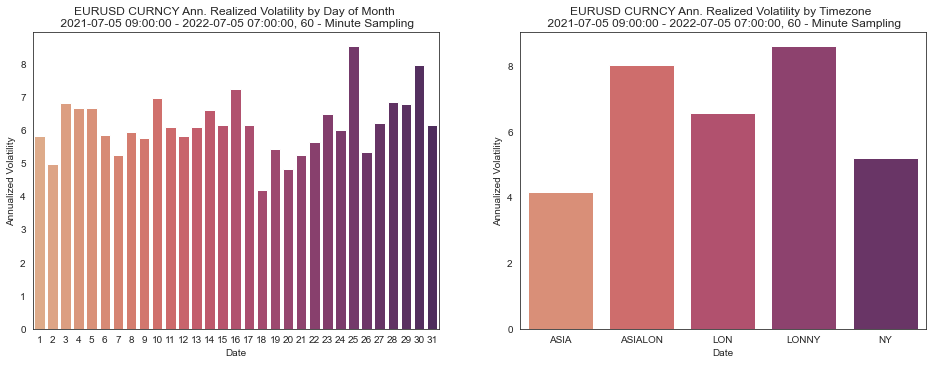

In [402]:
vol_distribution("EURUSD CURNCY", sampling_mins = 60)
